# Predicting the Sale Price of Bulldozers using Machine Learning 

In this notebook, we're going to go through an axample machine learning project with the goal of predicting the sale price of bulldozers. 

## 1. Problem Definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for? 

## 2. Data 

The three (3) datasets:  

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: 
www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE. 

## 4. Features 

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets in the data folder.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn

In [2]:
# Import training and validation datasets 
df = pd.read_csv('data/TrainAndValid.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

In [5]:
df.isna().sum() 

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

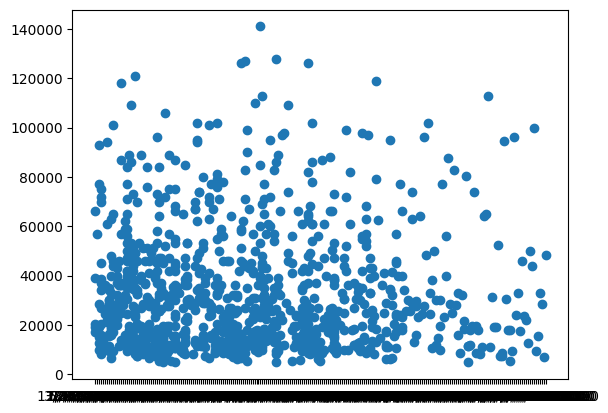

In [6]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

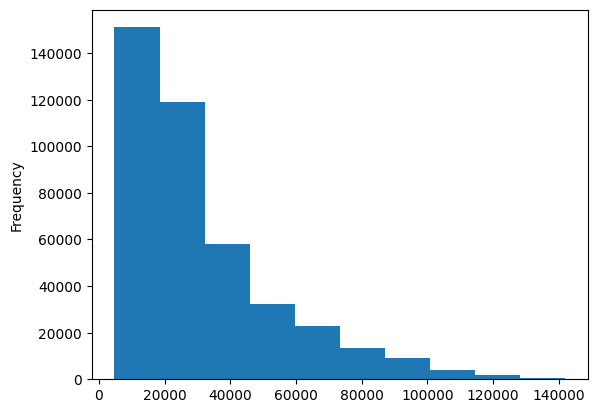

In [7]:
df.SalePrice.plot.hist()

## Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible. 

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [8]:
# import data again but this time parse dates 
df = pd.read_csv('data/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [9]:
df.saledate.dtype 

dtype('<M8[ns]')

In [10]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [11]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

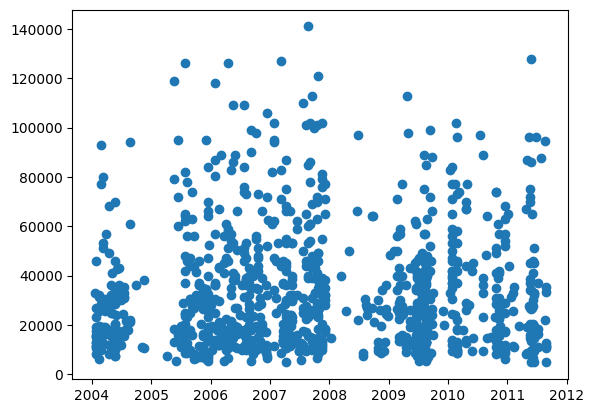

In [12]:
fig, ax = plt.subplots() 
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

## Sort DataFrame by Saledate 

When working with time series data, it's a good idea to sort it by date. 

In [13]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.saledate[120:200].head(20)

100964   1989-02-01
127953   1989-02-01
173866   1989-02-01
172373   1989-02-01
170389   1989-02-01
242233   1989-02-01
28468    1989-02-01
164005   1989-02-01
274507   1989-02-01
28333    1989-02-01
79067    1989-02-01
173971   1989-02-01
129791   1989-02-01
171944   1989-02-01
170605   1989-02-01
79059    1989-02-01
231683   1989-02-01
30058    1989-02-01
171979   1989-02-01
117353   1989-02-01
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame 

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data. 

In [14]:
# Make a copy of the original data 
df_tmp = df.copy()

## Add datetime parameters for `saledate` column

In [15]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year 
df_tmp['saleMonth'] = df_tmp.saledate.dt.month 
df_tmp['saleDay'] = df_tmp.saledate.dt.day 

In [16]:
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek 
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear 

In [17]:
df_tmp.columns 

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],

In [18]:
df_tmp.head().T 

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [19]:
# Now we've enriched our DataFrame with date time features, we can remove the saledate column 
df_tmp.drop('saledate', axis=1, inplace=True)

## 5. Modelling 

We've done enough EDA (we could do more) but let's start to do some model-driven EDA.

In [20]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor(n_jobs=-1, 
                              random_state=12)

In [21]:
# Next we need to check to make sure our data passes the minimum requirement for training (i.e no missing value and all features are numeric)
df_tmp.dtypes 

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [22]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [23]:
# As can be seen from results above, there are both missing and non-numerical features in out dataframe.

### Convert string to categories 

One way we can turn all of our data into numbers is by converting them into pandas categories. 

https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html 

In [24]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [25]:
pd.api.types.is_string_dtype(df_tmp['UsageBand']) 

False

In [26]:
df_tmp.UsageBand.dtype 

dtype('O')

In [27]:
df_tmp.head() 

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [28]:
# find the columns which contains string 
for label, content in df_tmp.items():
    if (pd.api.types.is_string_dtype(content)) | (pd.api.types.is_object_dtype(content)):
        print(label) 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# This will turn all the string value into categorical values 
for label, content in df_tmp.items():
    if (pd.api.types.is_string_dtype(content)) or (pd.api.types.is_object_dtype(content)):
        df_tmp[label]= content.astype('category').cat.as_ordered() 

In [30]:
df_tmp.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [31]:
# df_tmp.drop('label', axis=1, inplace=True)

In [32]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [33]:
df_tmp.state.cat.categories 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [34]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to access all our data in the form of numbers.

But we still have a bunch of missing data... 

In [35]:
# Check missing data 
df_tmp.isnull().sum()/len(df_tmp) 

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save pre-processed data

In [36]:
# Export current tmp dataframe 
df_tmp.to_csv('data/train_tmp.csv', index=False)

In [37]:
# import pre-processed data 
df_tmp = pd.read_csv('data/train_tmp.csv', low_memory=False)
df_tmp.head().T 

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [38]:
np.full((10,4),12) 

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12],
       [12, 12, 12, 12]])

## Fill missing values 

### Fill numerical missing values first


In [39]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [40]:
df_tmp.ModelID 

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [41]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [42]:
# Fill numeric rows with the median 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median 
            df_tmp[label] = content.fillna(content.median())

In [43]:
df_tmp.isna().sum() 

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [44]:
# Demonstrate how median is more robust than mean 
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [45]:
# Check if there's any null numeric values 
for label, content in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [46]:
# Check to see how many examples were missing 
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [47]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

## Filling and turning categorical variables into numbers 

In [48]:
# Check for columns which aren't numeric 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [49]:
pd.Categorical(df_tmp['state']).dtype 

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [50]:
df_tmp['state'].dtype

dtype('O')

In [51]:
pd.Categorical(df_tmp['state']).codes 

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [52]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value 
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1 
        df_tmp[label] = pd.Categorical(content).codes + 1 # +1 is added because pandas represent NaN values for categoricals as -1, so we ad +1 to make everything positive

In [53]:
pd.Categorical(df_tmp['state']).codes + 1 

array([44,  9,  9, ...,  5,  5,  5], shape=(412698,), dtype=int8)

In [54]:
pd.Categorical(df_tmp["UsageBand"]).codes 

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [55]:
df_tmp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [56]:
df_tmp.head().T 

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [57]:
df_tmp.sample(frac=.5).isna().sum()[:15] 

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [58]:
# import time
# from sklearn.ensemble import RandomForestRegressor

# # Start timer
# start_time = time.time()

# # Instantiate model
# model = RandomForestRegressor(
#     n_jobs=-1,
#     random_state=42
# )

# # Fit the model
# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

# # End timer
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Time taken: {elapsed_time:.2f} seconds")


In [59]:
# Score the model 
# model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

##### Question: Why doesn't the above metric hold water? (Why isn't the metric reliable) 

Answer: Because we fit and score on the same data

#### Splitting data into train/validation sets

In [60]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [61]:
df_tmp.saleYear.value_counts()


saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [62]:
# Split data into training and validation 
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train) 

(11573, 401125)

In [63]:
# Split data into X & y 
X_train, y_train = df_train.drop('SalePrice', axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape 

((401125, 102), (401125,), (11573, 102), (11573,))

#### Building an evaluation function 

In [64]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error 

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels 
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds), 
              "Valid MAE": mean_absolute_error(y_valid, val_preds), 
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores 

### Testing our model on a subset (to tune the hyperparameters). 
This is done to reduce the amount of time it takes to run the process on the dataframe.

In [65]:
# This takes far too long...for experimenting 
''' 
%%time 
# instantiate model
 model = RandomForestRegressor(n_jobs=-1, 
                                random_state=42)
# Fit the model
model.fit(X_train, y_train)
''' 

' \n%%time \n# instantiate model\n model = RandomForestRegressor(n_jobs=-1, \n                                random_state=42)\n# Fit the model\nmodel.fit(X_train, y_train)\n'

#### One way to speed up this is to:
1. Slice the dataframe (perhaps randomly using df.sample())
2. Using the `max_sample` attribute in the model i.e RandomForestRegressor()

Ex for 1:
model.fit(X_train[:10000], y_train[:10000])

Ex for 2:
model = RandomForestRegressor(max_sample=10000)

In [66]:
# change max_sample value as necessary
model = RandomForestRegressor(n_jobs=-1,
                              random_state=12,
                              max_samples=10000)

In [67]:
import time 

start_time = time.time()

# Cutting down on the max number of samples for each estimator can see improve run time speed 
model.fit(X_train, y_train)

stop_time = time.time() 
runtime = stop_time - start_time
print(f'Total runtime = {runtime}')

Total runtime = 24.925211668014526


In [68]:
show_scores(model)

{'Training MAE': 5549.380662711126,
 'Valid MAE': 7127.60014170915,
 'Training RMSLE': np.float64(0.2572317730614285),
 'Valid RMSLE': np.float64(0.29196121344703185),
 'Training R^2': 0.8610086221912736,
 'Valid R^2': 0.8342278350933525}

### Hyperparameter tuning with RandomizedSearchCV 

In [88]:
import time

start = time.time() 

from sklearn.model_selection import RandomizedSearchCV 

# Different RandomForestRegressor hyperparameters 
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [.5, 1, "sqrt"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    n_iter=2,
                                                    cv=5,
                                                    verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

stop = time.time() 
total_time = stop-start 
print(f'Total time: {total_time}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Total time: 19.02742576599121


In [89]:
# Find the best model hyperparameters 
rs_model.best_params_ 

{'n_estimators': np.int64(10),
 'min_samples_split': np.int64(8),
 'min_samples_leaf': np.int64(15),
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [90]:
# Evaluate the RandomizedSearch model 
show_scores(rs_model)

{'Training MAE': 11577.764462954123,
 'Valid MAE': 13360.106309321132,
 'Training RMSLE': np.float64(0.49945613954622975),
 'Valid RMSLE': np.float64(0.5133913433800147),
 'Training R^2': 0.4998526548494906,
 'Valid R^2': 0.5065483917714623}

### Train a model with the best hyperparameters 
<b>Note:</b> These were found after 100 iterations of `RandomizedSearchCV`

In [91]:
import time

start = time.time() 

# Most ideal hyperparameters 
ideal_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = .5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 12)

# Fit the ideal model 
ideal_model.fit(X_train, y_train) 

stop = time.time() 
total_time = stop - start 
print(f'Total time: {total_time}')

Total time: 119.2705647945404


In [ ]:
# Scores on ideal_model (only trained on all data)
show_scores(ideal_model)

{'Training MAE': 2953.658138870187,
 'Valid MAE': 5931.634567426619,
 'Training RMSLE': np.float64(0.14460827599983905),
 'Valid RMSLE': np.float64(0.24624921339957093),
 'Training R^2': 0.9588691857373032,
 'Valid R^2': 0.882710393925302}

In [97]:
# Scores on ideal_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 11577.764462954123,
 'Valid MAE': 13360.106309321132,
 'Training RMSLE': np.float64(0.4994561395462297),
 'Valid RMSLE': np.float64(0.5133913433800147),
 'Training R^2': 0.4998526548494906,
 'Valid R^2': 0.5065483917714623}

### Make predictions on test dataset

In [143]:
# Import the test data 
df_test = pd.read_csv('data/Test.csv', low_memory=False, parse_dates=['saledate'])

df_test.head() 

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [144]:
df_test.columns 

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [146]:
def preprocess_data(df): 
    '''
    Performs transformations on df and returns transformed df.
    '''
    df["saleYear"] = df.saledate.dt.year 
    df["saleMonth"] = df.saledate.dt.month 
    df["saleDay"] = df.saledate.dt.day 
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek 
    df["saleDayOfYear"] = df.saledate.dt.dayofyear 

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median 
    for label, content in df.items(): 
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): 
                # Add a binary column which telss us if the data was missing or not
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing numeric values with median 
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)
            # We add +1 to the category code because pandas encode missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    return df 

In [147]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head() 

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [148]:
len(X_train.columns), len(df_test.columns)

(102, 101)

In [149]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 101, dtype: int64

In [150]:
X_train.columns.value_counts()

SalesID                         1
MachineID                       1
ModelID                         1
datasource                      1
auctioneerID                    1
                               ..
Backhoe_Mounting_is_missing     1
Blade_Type_is_missing           1
Travel_Controls_is_missing      1
Differential_Type_is_missing    1
Steering_Controls_is_missing    1
Name: count, Length: 102, dtype: int64

In [151]:
df_test.columns 

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=101)

In [152]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [153]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [ ]:
# Manually adjust df_test to have 'auctioneerID_is_missing'
df_test['auctioneerID_is_missing'] = False

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [156]:
X_train.columns, df_test.columns 

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
        'Thumb_is_missing', 'Pattern_Changer_is_missing',
        'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
        'Blade_Type_is_missing', 'Travel_Controls_is_missing',
        'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
       dtype='object', length=102),
 Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
        'fiBaseModel',
        ...
        'Stick_Length_is_missing', 'Thumb_is_missing',
        'Pattern_Changer_is_missing', 'Grouser_Type_is_missing',
        'Backhoe_Mounting_is_missing', 'Blade_Type_is_missing',
        'Travel_Controls_is_missing', 'Differential_Type_is_missing',
        '

In [155]:
# Make predictions on the test dataset 
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [157]:
set(X_train.columns) - set(df_test.columns) 

set()

In [158]:
# Since it is confirmed that there are no missing columns, the problem is most likely related to ordering 
# Re-align `df_test` to have it's columns ordered w.r.t X_train 

df_test_reordered = df_test[X_train.columns]


In [160]:
test_preds = ideal_model.predict(df_test_reordered)

In [165]:
len(X_train), len(df_test), len(df_test_reordered) 

(401125, 12457, 12457)

In [163]:
test_preds

array([17431.52380362, 15996.509885  , 46217.18411394, ...,
       15114.49665347, 18281.08211743, 27315.35667227], shape=(12457,))

We have made some predictions but they are not in the order Kaggle is asking for

In [171]:
df_preds = pd.DataFrame() 
df_preds['SalesID'] = df_test_reordered['SalesID']
df_preds['SalesPrice'] = np.round(test_preds) 
df_preds 

,SalesID,SalesPrice
0,1227829,17432.0
1,1227844,15997.0
2,1227847,46217.0
3,1227848,67752.0
4,1227863,55737.0
...,...,...
12452,6643171,40669.0
12453,6643173,14309.0
12454,6643184,15114.0
12455,6643186,18281.0


In [172]:
# Export prediction data 
df_preds.to_csv('data/test_predictions.csv', index=False)

### Feature Importance 

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the target variable *(SalePrice)*

**Note:** To figure out this for any model, you just need to search 'model_name feature importance' or ask AI chats

In [174]:
# Find the feature importance of our best model
important_features = ideal_model.feature_importances_ 

In [175]:
len(important_features) 

102

In [178]:
# Helper function for plotting feature importance 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns, 
                        "feature_importances": importances})
                        .sort_values("feature_importances", ascending=False)
                        .reset_index(drop=True))
    
    # Plot the dataframe 
    fig, ax = plt.subplots() 
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

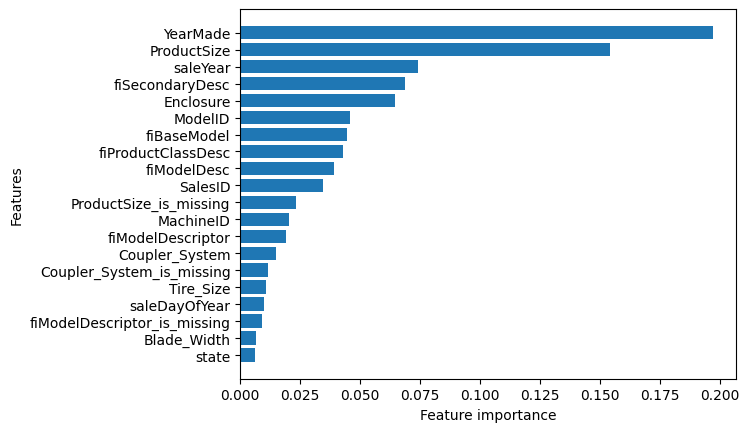

In [179]:
plot_features(X_train.columns, ideal_model.feature_importances_)

**Question to finish:** Why might knowing the feature importance of a trained machine learning model be helpful? 

**Final challenge:** What other machine learning models could you try on our dataset? Hint: check out the regression section of the Scikit-Learn model map, or try to look at something like Catboost.ai or XGBoost.ai.